## Generate bounding box coordinates of a regular grid in Numpy
- Source: https://github.com/carlosg-m/goose-lab

In [1]:
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely 
import pygeos

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


##### Create a 2d regular grid with NumPy as an array of 4 dimenions: xmin, ymin, xmax, ymax.
- The xmin, ymin, xmax, ymax input parameters define the bounds of the grid.
- The input parameters xstep and ystep define the number of rectangles in the x-axis and y-axis respectively.
- The index of the grid is also returned.
- Every operation is vectorized and implemented in NumPy so it should be very efficient.

In [2]:
def create_grid(xmin, ymin, xmax, ymax, xstep, ystep):
    """
    Create bounding coordinates for a regular 2d grid with numpy.
    These coordinates can then be used with shapely, pygeos and geopandas.
    """
    
    # Generate two evenly spaced ranges
    x = np.linspace(xmin, xmax, int(xstep+1))
    y = np.linspace(ymin, ymax, int(ystep+1))
    
    # Get center points for each range
    x = np.mean((x[1:], x[:-1]), axis=0)
    y = np.mean((y[1:], y[:-1]), axis=0)
    
    # Cartesian product of both ranges 
    x, y = np.meshgrid(x, y)
    x, y = x.ravel(), y.ravel()

    # Calculate delta x and delta y
    xd = (xmax - xmin) / (xstep * 2)
    yd = (ymax - ymin) / (ystep * 2)
    
    # Repeat center points and add respective delta
    grid = np.column_stack((x,y))
    grid = np.tile(grid, 2) + np.array([[-xd, -yd, xd, yd]])
    
    # Generate index
    grid_index = np.arange(0, xstep * ystep)
    
    # Output coordinates: xmin, ymin, xmax, ymax
    return grid, grid_index


##### Examples:

- Generate 5x5 grid.
- Load as Shapely polygons.
- Plot with GeoPandas.

In [3]:
grid, grid_index = create_grid(xmin=0, ymin=0, xmax=10, ymax=10, xstep=5, ystep=5)

In [4]:
grid

array([[ 0.,  0.,  2.,  2.],
       [ 2.,  0.,  4.,  2.],
       [ 4.,  0.,  6.,  2.],
       [ 6.,  0.,  8.,  2.],
       [ 8.,  0., 10.,  2.],
       [ 0.,  2.,  2.,  4.],
       [ 2.,  2.,  4.,  4.],
       [ 4.,  2.,  6.,  4.],
       [ 6.,  2.,  8.,  4.],
       [ 8.,  2., 10.,  4.],
       [ 0.,  4.,  2.,  6.],
       [ 2.,  4.,  4.,  6.],
       [ 4.,  4.,  6.,  6.],
       [ 6.,  4.,  8.,  6.],
       [ 8.,  4., 10.,  6.],
       [ 0.,  6.,  2.,  8.],
       [ 2.,  6.,  4.,  8.],
       [ 4.,  6.,  6.,  8.],
       [ 6.,  6.,  8.,  8.],
       [ 8.,  6., 10.,  8.],
       [ 0.,  8.,  2., 10.],
       [ 2.,  8.,  4., 10.],
       [ 4.,  8.,  6., 10.],
       [ 6.,  8.,  8., 10.],
       [ 8.,  8., 10., 10.]])

- Plot grid with Shapely, GeoPandas and PyPlot.

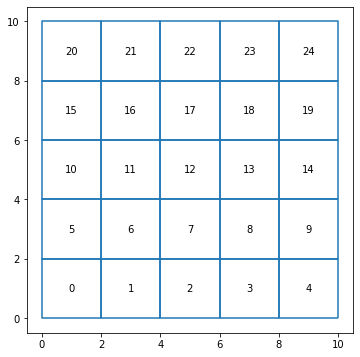

In [5]:
grid_shapely = list(map(lambda x: shapely.geometry.box(*x), grid))

fig, ax = plt.subplots(figsize=(6,6))

gpd.GeoDataFrame(geometry=grid_shapely).exterior.plot(ax=ax)

for coos, index in zip(grid, grid_index):
    ax.text(coos[[0,2]].mean(), coos[[1,3]].mean(), str(index), horizontalalignment='center', verticalalignment='center')

- Generate 10x5 grid.

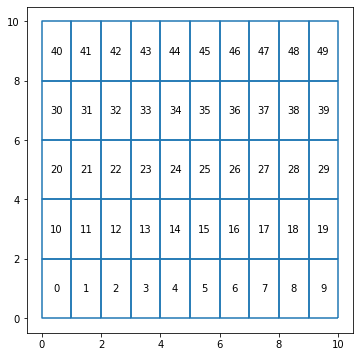

In [6]:
grid, grid_index = create_grid(xmin=0, ymin=0, xmax=10, ymax=10, xstep=10, ystep=5)

grid_shapely = list(map(lambda x: shapely.geometry.box(*x), grid))

fig, ax = plt.subplots(figsize=(6,6))

gpd.GeoDataFrame(geometry=grid_shapely).exterior.plot(ax=ax)

for coos, index in zip(grid, grid_index):
    ax.text(coos[[0,2]].mean(), coos[[1,3]].mean(), str(index), horizontalalignment='center', verticalalignment='center')

- Generate 5x10 grid.
- This time with different input bounds.

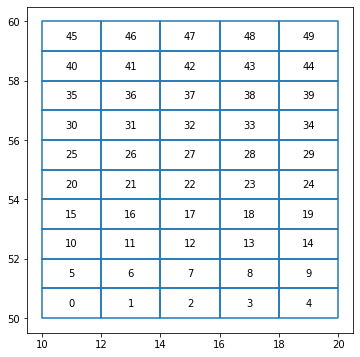

In [7]:
grid, grid_index = create_grid(xmin=10, ymin=50, xmax=20, ymax=60, xstep=5, ystep=10)

grid_shapely = list(map(lambda x: shapely.geometry.box(*x), grid))

fig, ax = plt.subplots(figsize=(6,6))

gpd.GeoDataFrame(geometry=grid_shapely).exterior.plot(ax=ax)

for coos, index in zip(grid, grid_index):
    ax.text(coos[[0,2]].mean(), coos[[1,3]].mean(), str(index), horizontalalignment='center', verticalalignment='center')

- Generate 1x1 grid.

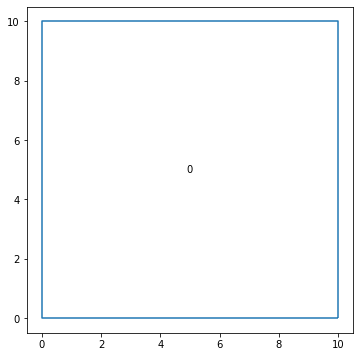

In [8]:
grid, grid_index = create_grid(xmin=0, ymin=0, xmax=10, ymax=10, xstep=1, ystep=1)

grid_shapely = list(map(lambda x: shapely.geometry.box(*x), grid))

fig, ax = plt.subplots(figsize=(6,6))

gpd.GeoDataFrame(geometry=grid_shapely).exterior.plot(ax=ax)

for coos, index in zip(grid, grid_index):
    ax.text(coos[[0,2]].mean(), coos[[1,3]].mean(), str(index), horizontalalignment='center', verticalalignment='center')

##### Bonus: load grid in PyGeos

In [9]:
grid, grid_index = create_grid(xmin=0, ymin=0, xmax=10, ymax=10, xstep=5, ystep=5)

In [10]:
grid_pygeos = pygeos.creation.box(*grid.T)

In [11]:
grid_pygeos

array([<pygeos.Geometry POLYGON ((2 0, 2 2, 0 2, 0 0, 2 0))>,
       <pygeos.Geometry POLYGON ((4 0, 4 2, 2 2, 2 0, 4 0))>,
       <pygeos.Geometry POLYGON ((6 0, 6 2, 4 2, 4 0, 6 0))>,
       <pygeos.Geometry POLYGON ((8 0, 8 2, 6 2, 6 0, 8 0))>,
       <pygeos.Geometry POLYGON ((10 0, 10 2, 8 2, 8 0, 10 0))>,
       <pygeos.Geometry POLYGON ((2 2, 2 4, 0 4, 0 2, 2 2))>,
       <pygeos.Geometry POLYGON ((4 2, 4 4, 2 4, 2 2, 4 2))>,
       <pygeos.Geometry POLYGON ((6 2, 6 4, 4 4, 4 2, 6 2))>,
       <pygeos.Geometry POLYGON ((8 2, 8 4, 6 4, 6 2, 8 2))>,
       <pygeos.Geometry POLYGON ((10 2, 10 4, 8 4, 8 2, 10 2))>,
       <pygeos.Geometry POLYGON ((2 4, 2 6, 0 6, 0 4, 2 4))>,
       <pygeos.Geometry POLYGON ((4 4, 4 6, 2 6, 2 4, 4 4))>,
       <pygeos.Geometry POLYGON ((6 4, 6 6, 4 6, 4 4, 6 4))>,
       <pygeos.Geometry POLYGON ((8 4, 8 6, 6 6, 6 4, 8 4))>,
       <pygeos.Geometry POLYGON ((10 4, 10 6, 8 6, 8 4, 10 4))>,
       <pygeos.Geometry POLYGON ((2 6, 2 8, 0 8, 0 6, 2 6))>,